# Project Mall-Customers Clustering using K-Means, Hierarchical Clustering and DBSCAN


# The data includes the following features:

1. Customer ID

2. Customer Gender

3. Customer Age

4. Annual Income of the customer (in Thousand Dollars)

5. Spending score of the customer (based on customer behaviour and spending nature)

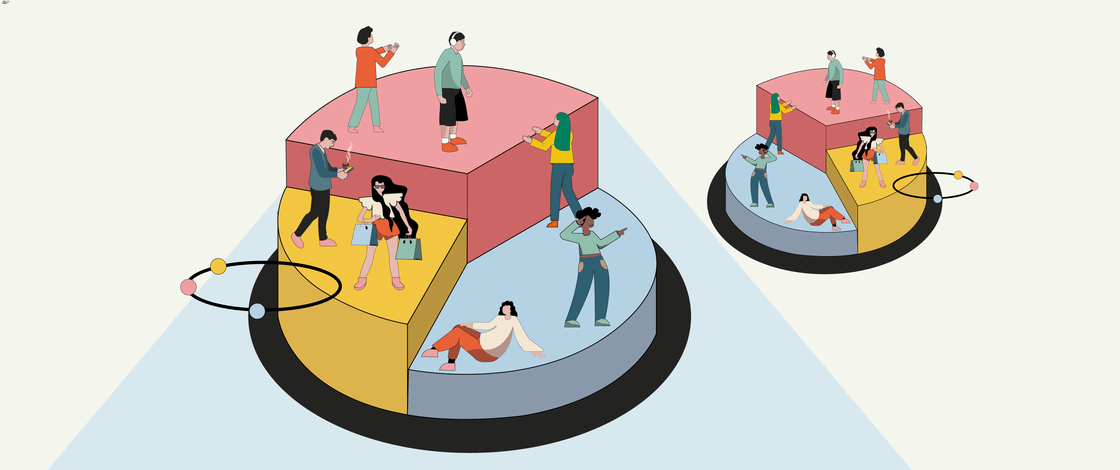

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import plotly as py
import plotly.graph_objs as go

import plotly.express as px

#KMeans
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch


#hierarchy cluster
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
#DBSCAN
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import LabelEncoder ,StandardScaler

import warnings
warnings.filterwarnings('ignore')


## Importing the dataset

In [3]:
data = pd.read_csv("Mall_Customers.csv")
data.head(20)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0            1    Male   19                  15                      39
1            2    Male   21                  15                      81
2            3  Female   20                  16                       6
3            4  Female   23                  16                      77
4            5  Female   31                  17                      40
5            6  Female   22                  17                      76
6            7  Female   35                  18                       6
7            8  Female   23                  18                      94
8            9    Male   64                  19                       3
9           10  Female   30                  19                      72
10          11    Male   67                  19                      14
11          12  Female   35                  19                      99
12          13  Female   58                  20                      15
13          14  Female   24                  20                      77
14          15    Male   37                  20                      13
15          16    Male   22                  20                      79
16          17  Female   35                  21                      35
17          18    Male   20                  21                      66
18          19    Male   52                  23                      29
19          20  Female   35                  23                      98

# Data Exploration


In [4]:
data.head(10)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

In [5]:
data.tail(10)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
190         191  Female   34                 103                      23
191         192  Female   32                 103                      69
192         193    Male   33                 113                       8
193         194  Female   38                 113                      91
194         195  Female   47                 120                      16
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

In [6]:
data.sample(10)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
167         168  Female   33                  86                      95
159         160  Female   30                  78                      73
126         127    Male   43                  71                      35
14           15    Male   37                  20                      13
64           65    Male   63                  48                      51
187         188    Male   28                 101                      68
148         149  Female   34                  78                      22
162         163    Male   19                  81                       5
175         176  Female   30                  88                      86
181         182  Female   32                  97                      86

In [7]:
data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [10]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [11]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Data Visualization


Text(0, 0.5, 'Count')

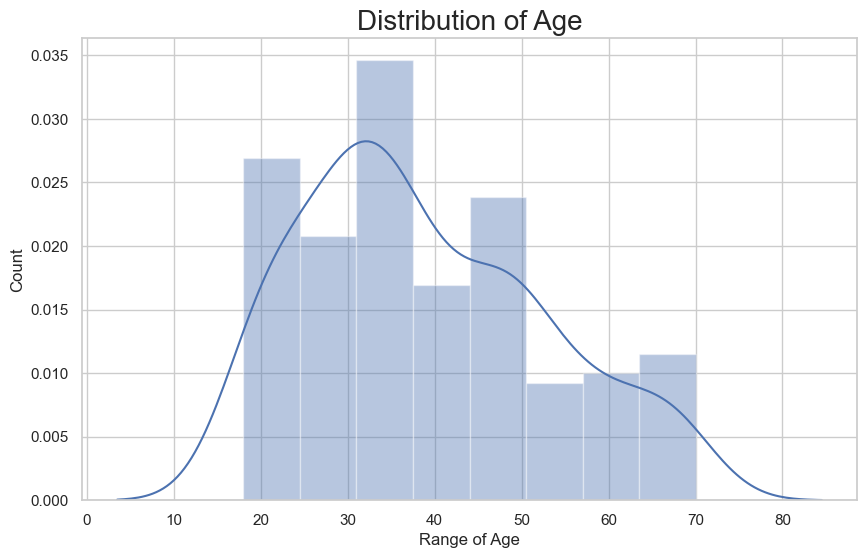

In [12]:
#Age Distribution:

#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

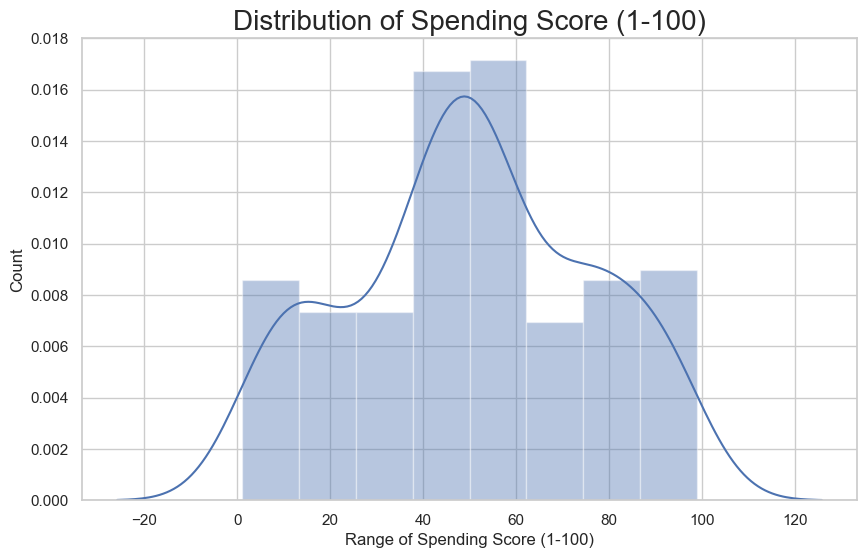

In [13]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

In [14]:
fig = px.pie(data, names='Gender')
fig.show()

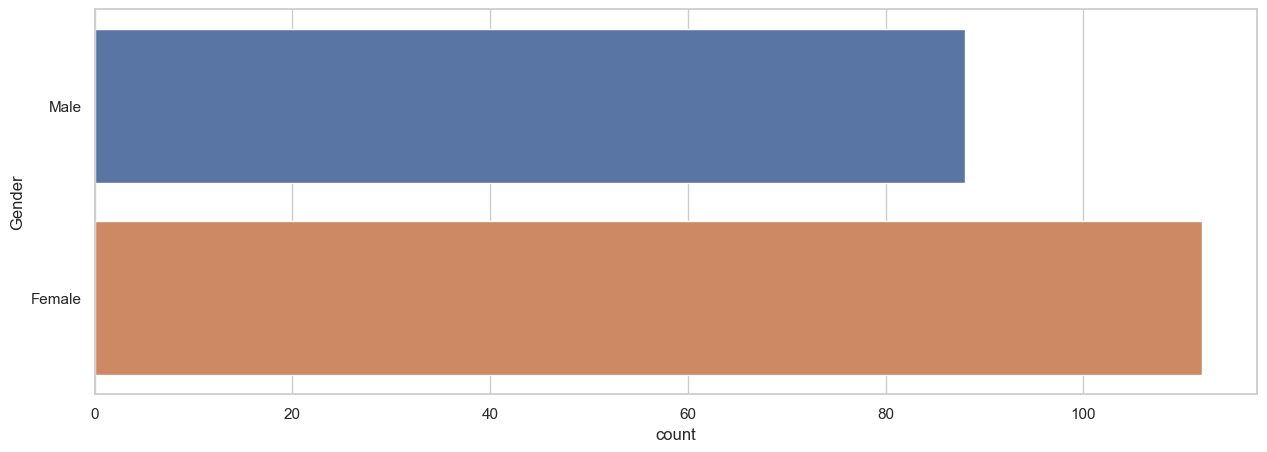

In [16]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = data)
plt.show()

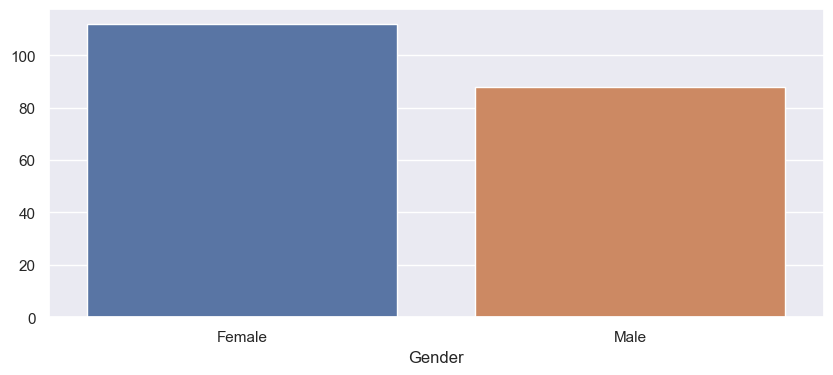

In [17]:
#Gender Analysis:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()


In [18]:
#We take just the Annual Income and Spending score
df = data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
df1 = data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X = df1[["Annual Income (k$)","Spending Score (1-100)"]]


In [19]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [20]:
df1

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [21]:
X

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

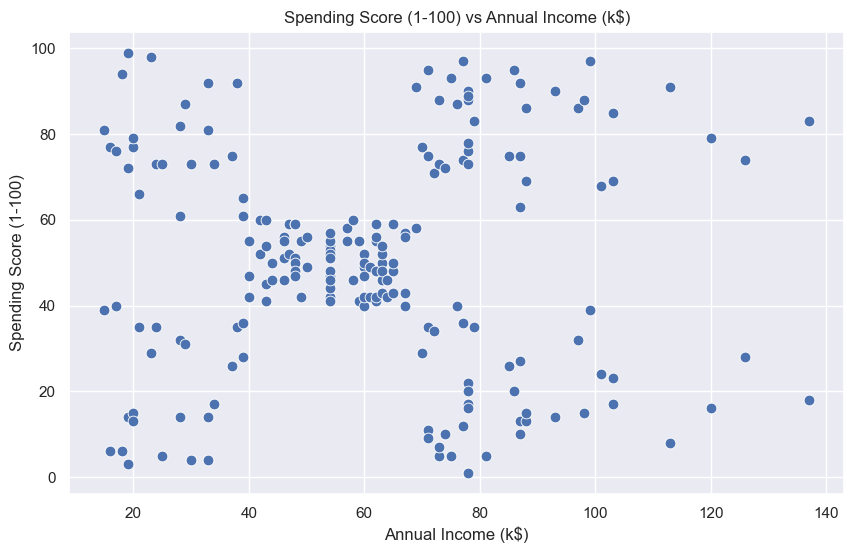

In [22]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

## Using the elbow method to find the optimal number of clusters

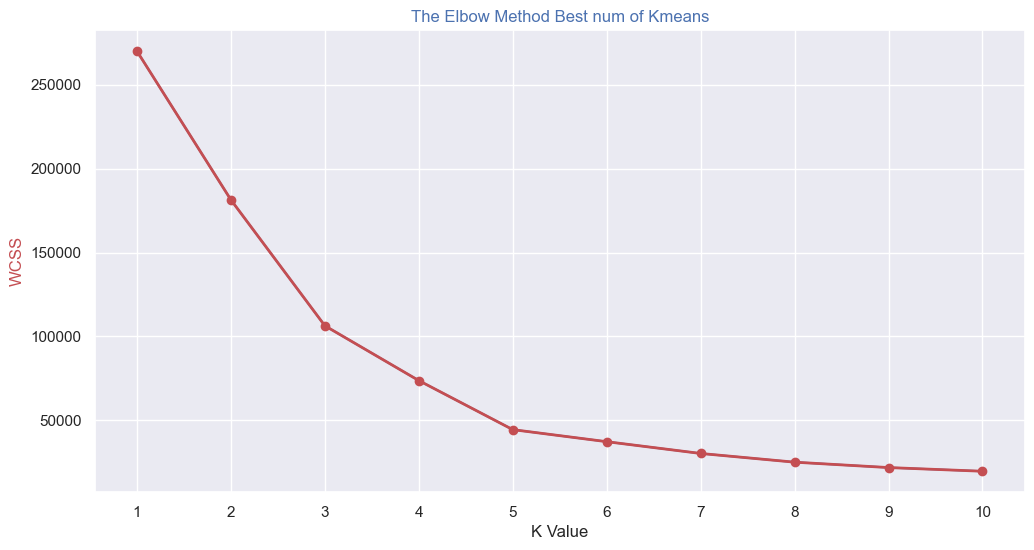

In [23]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
    
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, c="r", marker ="o")

plt.title('The Elbow Method Best num of Kmeans', c = 'b')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS" ,c = 'r')
plt.show()

In [24]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)

#Fitting the input data
km1.fit(X)

#predicting the labels of the input data
y=km1.predict(X)

#adding the labels to a column named label
df1["label"] = y

#The new dataframe with the clustering done
df1.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  label
0           1    Male   19                  15                      39      2
1           2    Male   21                  15                      81      3
2           3  Female   20                  16                       6      2
3           4  Female   23                  16                      77      3
4           5  Female   31                  17                      40      2

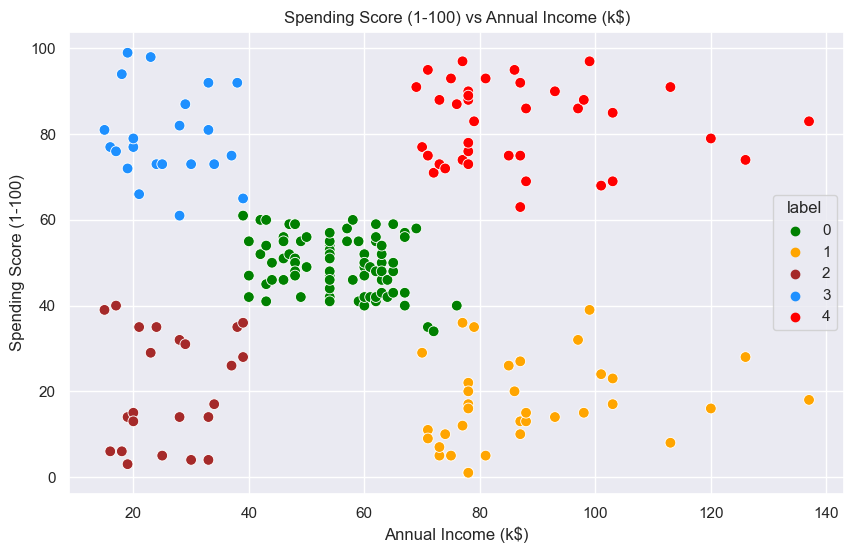

In [25]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# k-Means Clustering on the basis of 3D data


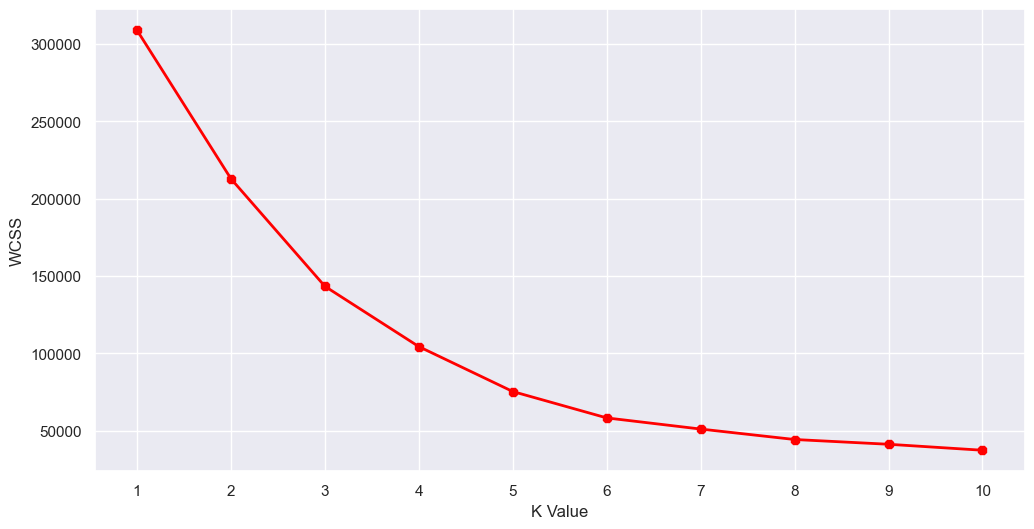

In [26]:
#Taking the features
X2 = df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]

#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [27]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df1["label"] = y2
#The data with labels
df1.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  label
0           1    Male   19                  15                      39      8
1           2    Male   21                  15                      81      0
2           3  Female   20                  16                       6      6
3           4  Female   23                  16                      77      0
4           5  Female   31                  17                      40      8

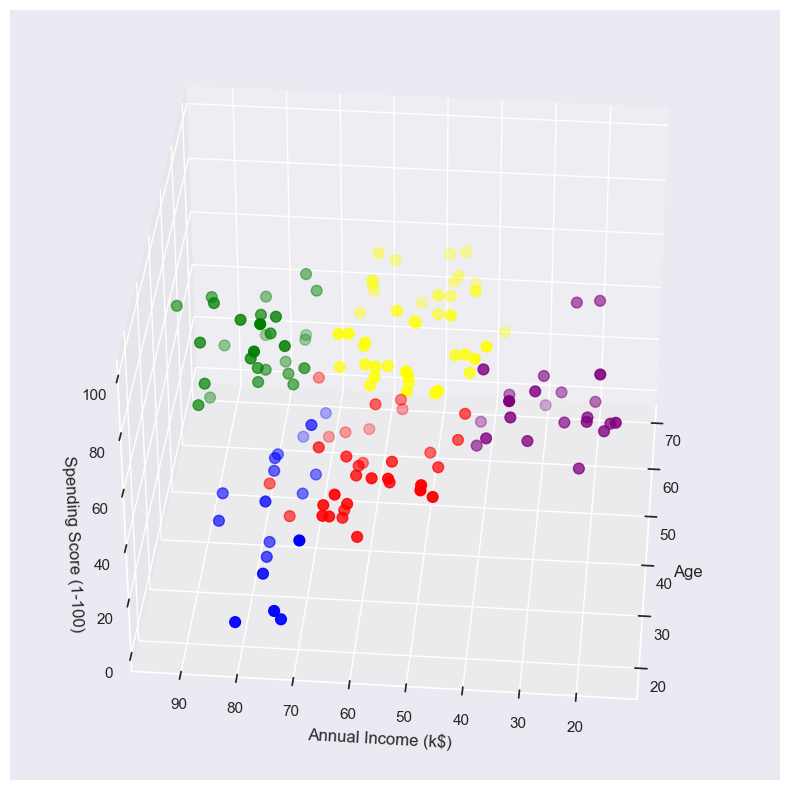

In [30]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(2, 1, 1, projection=Axes3D.name)

ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
#ax.view_init(20, -120)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [31]:
la = LabelEncoder()
data.Gender = la.fit_transform(data.Gender)

In [32]:
fig = plt.figure(figsize=(250,150))
fig = px.scatter_3d(data, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=km.fit_predict(data))
fig.show()

<Figure size 25000x15000 with 0 Axes>

In [36]:
#import plotly.express as px
fig = plt.figure(figsize=(250,150))

fig = px.scatter_3d(data, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=km.fit_predict(data), symbol='Gender', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside")) 
# fig.update_layout is being used to make the 'color' legend shift towards left side, otherwise the 'color' and 'Gender_Male' legends overlap
# fig.show()

<Figure size 25000x15000 with 0 Axes>

### DONE K-Means Clustering
### DONE Hierarchical Clustering

# Hierarchical Clustering


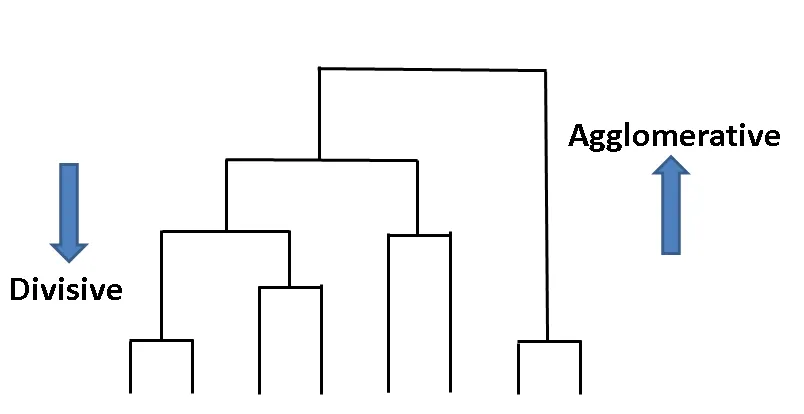

# Important Note
affinity --> default=’euclidean’

Metric used to compute the linkage. Can be **euclidean**, **l1**, **l2**, **manhattan**, **cosine**, or **precomputed**. 

If **linkage** is **ward**, **only euclidean** is accepted. 

If **precomputed**, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.


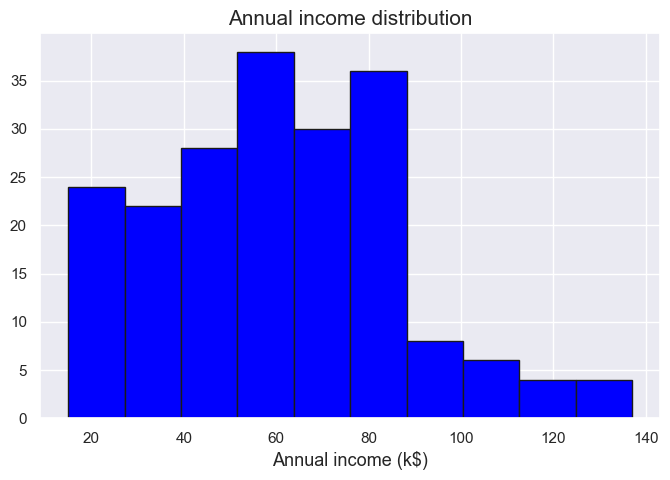

In [37]:
#checking the distribution of Annual Income

plt.figure(figsize=(8,5))
plt.title("Annual income distribution",fontsize=15)
plt.xlabel ("Annual income (k$)",fontsize=13)
plt.grid(True)
plt.hist(data['Annual Income (k$)'],color='blue',edgecolor='k')
plt.show()

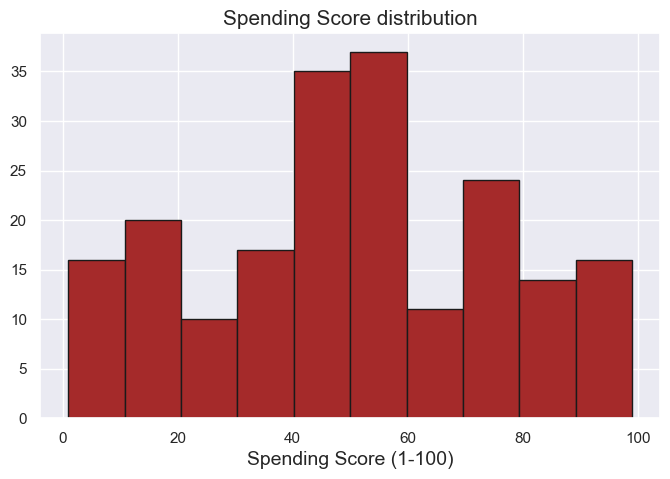

In [38]:
#checking the distribution of Spending Score
plt.figure(figsize=(8,5))
plt.title("Spending Score distribution",fontsize=15)
plt.xlabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.hist(data['Spending Score (1-100)'],color='brown',edgecolor='k')
plt.show()

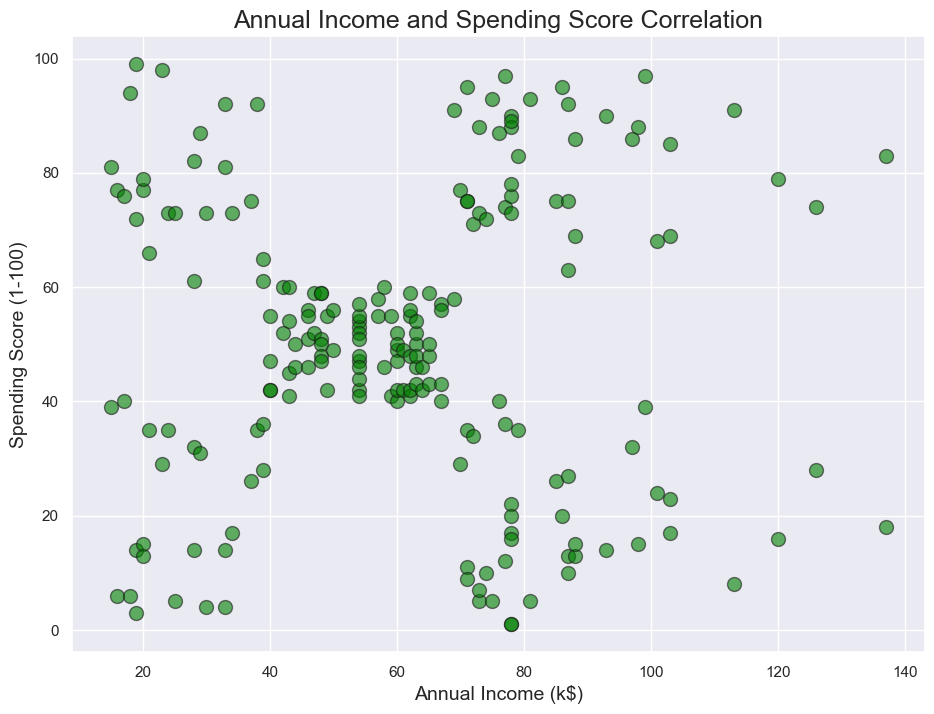

In [39]:
#Visualizing Annual Income and Spending Score using Scatter Plot

plt.figure(figsize=(11,8))
plt.title("Annual Income and Spending Score Correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],color='green',edgecolor='k',alpha=0.6, s=100)
plt.show()

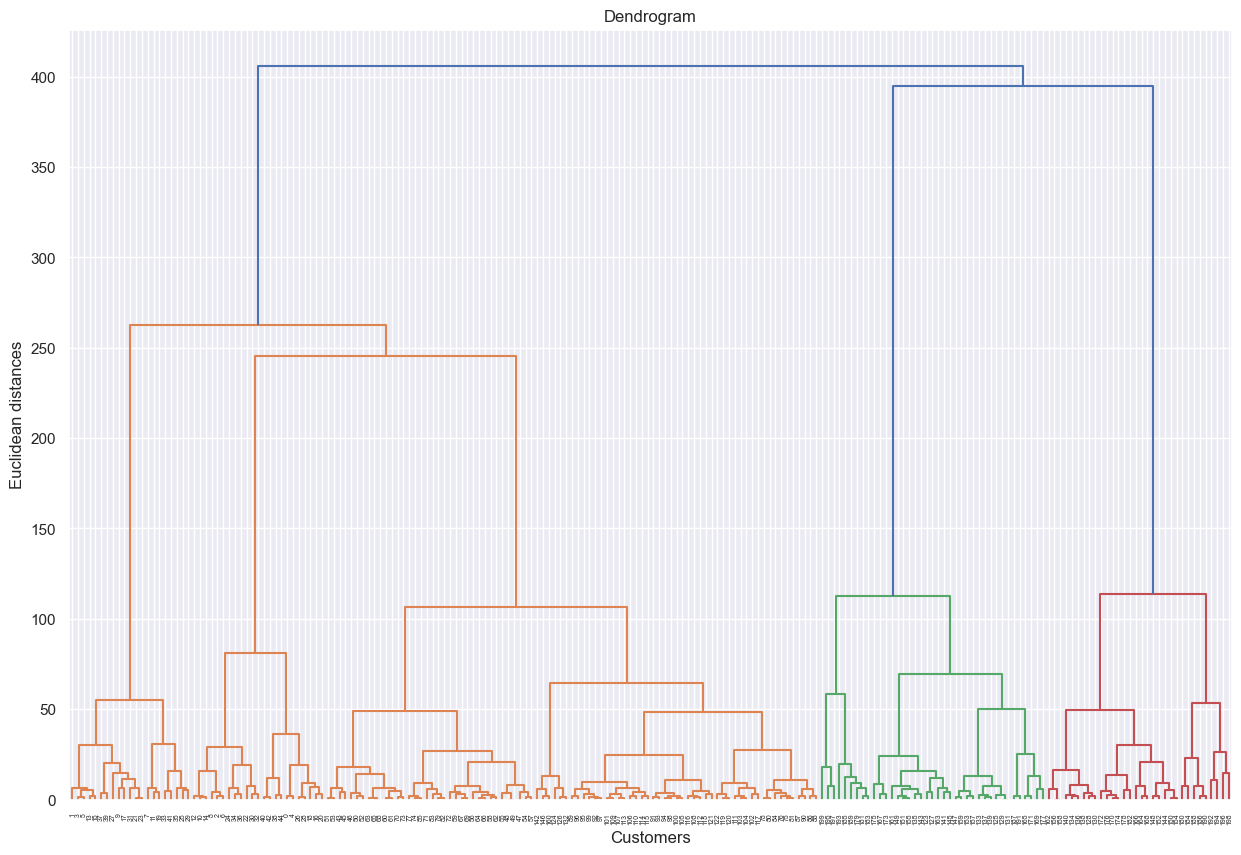

In [40]:
#use a ‘ward’ linkage criterion

X = data.iloc[:,[3,4]].values

plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [ ]:
X

In [41]:
'''
plt.figure(figsize=(15,10))

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'single'))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'complete'))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'average'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
'''


"\nplt.figure(figsize=(15,10))\n\ndendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))\ndendrogrm = sch.dendrogram(sch.linkage(X, method = 'single'))\ndendrogrm = sch.dendrogram(sch.linkage(X, method = 'complete'))\ndendrogrm = sch.dendrogram(sch.linkage(X, method = 'average'))\n\nplt.title('Dendrogram')\nplt.xlabel('Customers')\nplt.ylabel('Euclidean distances')\nplt.show()\n"

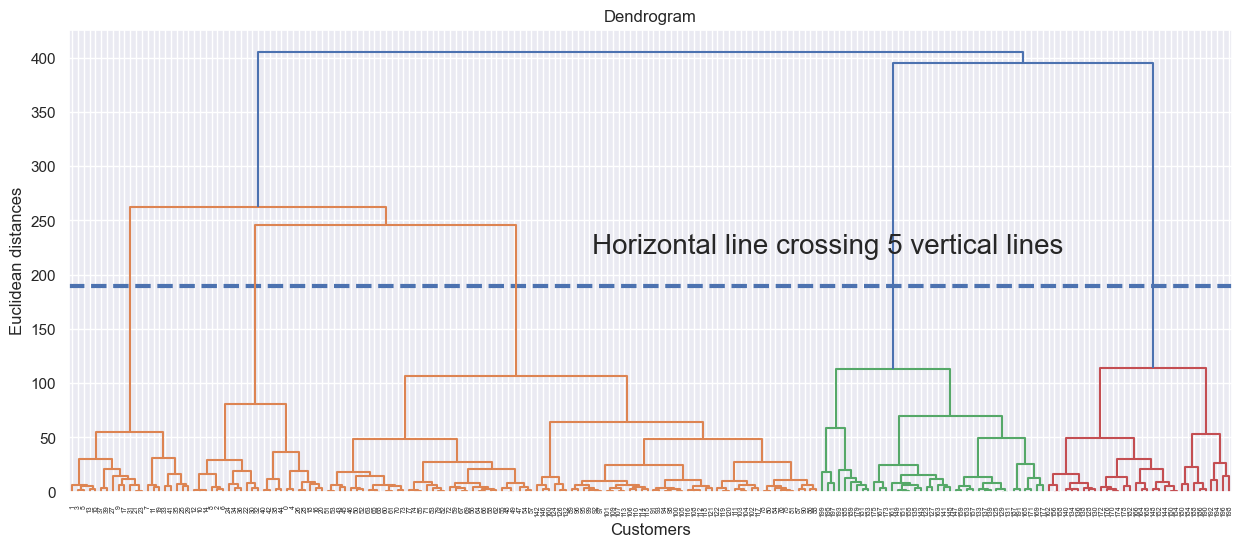

In [42]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')

plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)

plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()


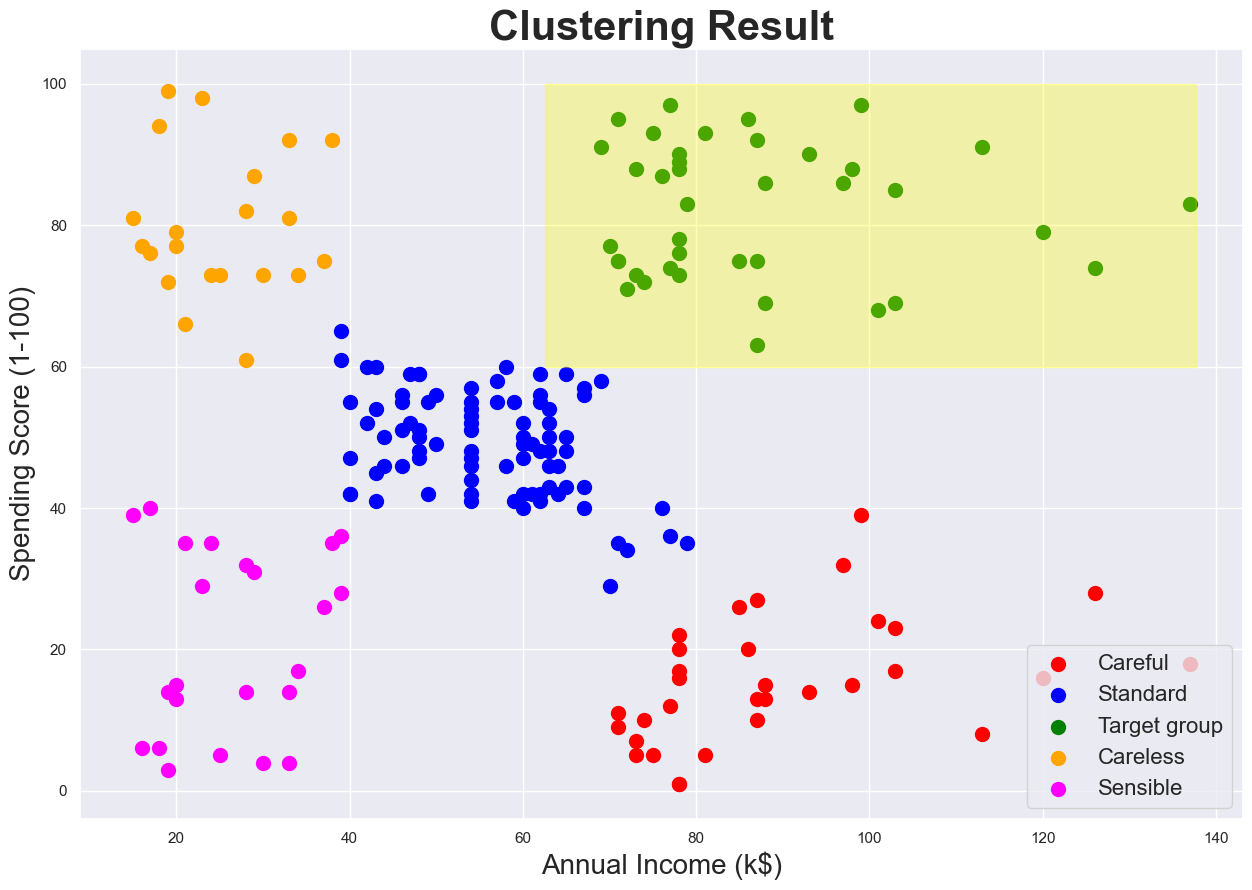

In [43]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
plt.figure(figsize=(15,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target group')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clustering Result', fontweight='bold',fontsize=30)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

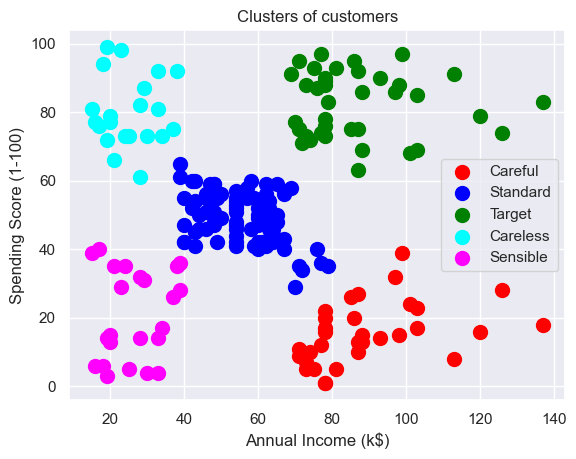

In [44]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

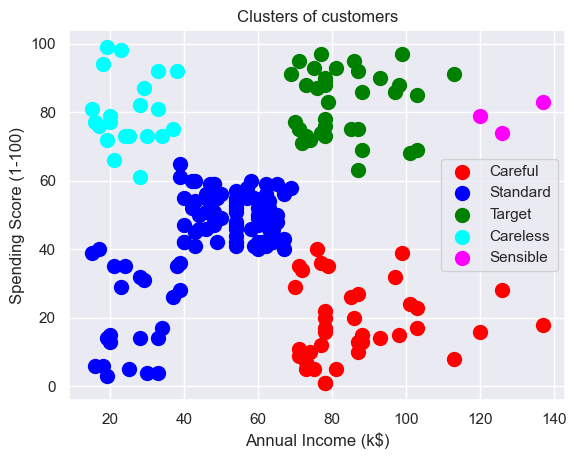

In [45]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

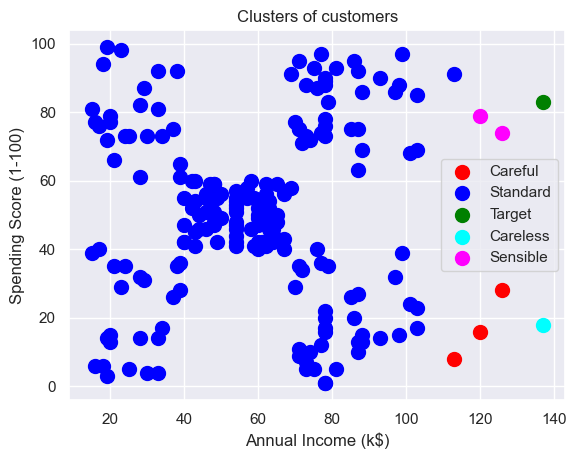

In [46]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(X)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

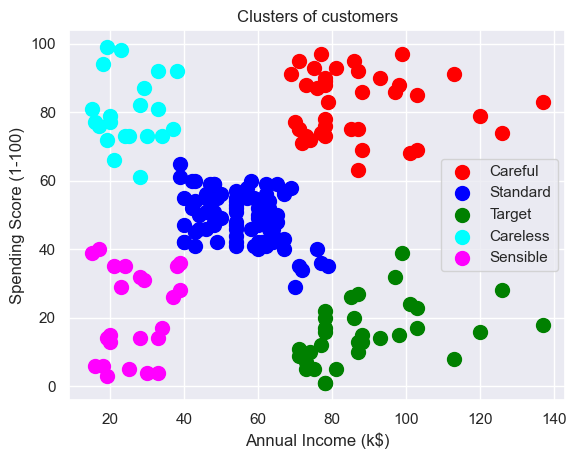

In [47]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [48]:
#import plotly.express as px
fig = px.scatter_3d(data, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=km.fit_predict(data), symbol='Gender', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))
# fig.show()


In [ ]:
#la = LabelEncoder()
#data.Gender = la.fit_transform(data.Gender)

In [ ]:
#Convert Sex into 0,1 
#data['Gender'] = data['Gender'].replace(['male','female'],[0,1])

### DONE Hierarchical Clustering


# Thank You 


# 3D Scatter Plots in Python

-https://plotly.com/python/3d-scatter-plots/

- https://www.analyticsvidhya.com/blog/2021/05/k-means-clustering-with-mall-customer-segmentation-data-full-detailed-code-and-explanation/
- https://deepnote.com/app/maxbm19/Customer-Segmentation-07015821-b886-4085-bf81-ccdf80251e8c
- https://nzlul.medium.com/clustering-method-using-k-means-hierarchical-and-dbscan-using-python-5ca5721bbfc3
- https://www.kdnuggets.com/2022/08/implementing-dbscan-python.html
- https://medium.com/analytics-vidhya/clustering-analysis-of-mall-customer-bd785577f1b0
